# Output Delivery System(ODS)とグラフ

ここでは、Output Delivery System（ODS）を使用して、Webブラウザで表示できるHTML出力、高解像度プリンター用にフォーマットされたPDFファイル、Microsoft Wordに簡単にインポートできるRTFファイルなどの形式の出力を作成する方法を扱います。その過程で、デフォルトでさまざまなプロシージャから取得される出力の外観を変更する方法についても触れます。最後に、ODSを使用して、さまざまなプロシージャからのデフォルト出力ではなく、データセットを作成する方法を扱います。

また、SGPLOTプロシージャに戻って、線種、色、軸ラベル、凡例などのグラフのパラメータを調整する方法を確認します。

## Output Delivery System(ODS)

ここでOutput Delivery System(ODS)についてを扱うことで、初めて使用するようになるという印象を受けるかもしれません。実際にはSASはこれまでずっと裏側でODSを使用して、私たちが使用してきたプロシージャがデフォルトで生成するリスト出力を作成していました。ここではODSの仕組みとデフォルト設定を変更して、私たちが望む出力を入手する方法を確認します。

### ODSの仕組み

では、ODSはどのように機能するのでしょうか？出力を作成するプログラムを実行するたびに、ODSは次の処理を行います。

1) ODSは**出力オブジェクト**の形で出力を生成します。各出力オブジェクトは2つのコンポーネントで構成されています。**データコンポーネント**には、プロシージャまたはDATAステップの結果（数値を想像してください）が含まれています。**テーブル定義**は結果のレンダリング方法（構造を想像してください）を指定します。たとえば、FREQプロシージャを実行して次の出力を生成したとします。

|A<br>Frequency Percent|B<br>1|B<br>2|Total|
|-----------------|---|---|-----|
|1| 60| 40| 100|
| |30.00| 20.00| 50.00|
|2| 40| 60| 100|
| |20.00| 30.00| 50.00|
|Total| 100| 100| 200|
| |50.00| 50.00| 100.00|


SASは実際にはこの出力を、テーブル定義：

|A<br>Frequency Percent|B<br>1|B<br>2|Total|
|-----------------|---|---|-----|
| | | | |
| | | | |
| | | | |
| | | | |
| | | | |
| | | | |


とデータコンポーネント：
| A | B | COUNT| PERCENT|
|---|---|---|---|
|1| 1| 60| 30|
|1| 2| 40| 20|
|2| 1| 40| 20|
|2| 2| 60| 30|


の2つから作成します。

2) SASが実行されたプログラムからすべての出力オブジェクトを作成したら、オブジェクトを保存する場所を指定するだけです。実際には非常に簡単です... SASは、SASに送信するように指定したODSの出力先に、出力を送信します。またそうする際に、出力先として指定された形式でファイルに出力します。これはODSが非常に強力であり、したがって非常に優れているところです！SASプロシージャによってデフォルトで生成されるリスト出力に加えて、以下のような出力先(形式)で、出力を送信できます。

|**出力先(形式)**| **出力内容**|
|----------------|-------------|
|HTML| HyperText Markup Language（HTML）でフォーマットされた出力。Webブラウザで表示できます。|
|Output| SASデータセット|
|Printer Family| Post Script（PS）、Portable Document Format（PDF）、Printer Control Language（PCL）ファイルなど、高解像度プリンター用にフォーマットされた出力|
|RTF| Microsoft Wordで使用するためのリッチテキスト形式の出力|

次のセクションでは、これらのさまざまなODS出力先を「開く」と「閉じる」ことで、SASに出力を送信する場所を指示する方法を確認します。

<!-- 
# The Output Delivery System and Graphics

In this lesson, we'll learn how to use the SAS System's Output Delivery System (ODS) to create other forms of output, such as HTML output that can be viewed by your web browser, PDF files that are formatted for high-resolution printers, and RTF files that can be easily imported into Microsoft Word. Along the way, we'll also learn how to modify the appearance of the output that is obtained by default from any procedure. Finally, we'll learn how to use the Output Delivery System to create SAS data sets instead of the default output from various procedures.

We will also return to the SG plotting procedures to investigate how to adjust graphical parameters such as line types, colors, axes labels, legends, etc.

## The Output Delivery System

You might be getting the impression that by learning about the Output Delivery System (ODS) in this lesson that it will be the first time we use it. In reality, SAS has been using it behind the scenes all along to create the listing output that the procedures we've used generates by default. All we want to do in this lesson is learn how ODS works and how to change the default settings so that we can get the output that we want rather than the output that SAS wants.

### How ODS Works

So how does ODS work? Whenever you submit a program that creates output, ODS does the following:

1) ODS creates your output in the form of **output objects**. Each output object is comprised of two components. The **data component** contains the results — think numbers — of a procedure or a DATA step. The **table definition** tells SAS how to render the results — think structure. For example, suppose we executed the FREQ procedure so that it created the following output:

|A<br>Frequency Percent|B<br>1|B<br>2|Total|
|-----------------|---|---|-----|
|1| 60| 40| 100|
| |30.00| 20.00| 50.00|
|2| 40| 60| 100|
| |20.00| 30.00| 50.00|
|Total| 100| 100| 200|
| |50.00| 50.00| 100.00|

SAS actually creates this piece of output from its two parts, the table definition:

|A<br>Frequency Percent|B<br>1|B<br>2|Total|
|-----------------|---|---|-----|
| | | | |
| | | | |
| | | | |
| | | | |
| | | | |
| | | | |

and the data component:

| A | B | COUNT| PERCENT|
|---|---|---|---|
| | 1| 60| 30|
|1| 2| 40| 20|
|2| 1| 40| 20|
|2| 2| 60| 30|





  
  
2) Once SAS creates all of the output objects from an executed program, it then just needs to figure out where to send the objects. It's actually pretty easy... SAS sends the output to whatever ODS destination(s) you tell SAS to send it. And when doing so, SAS sends the output in the format specified by the destination. This is where ODS is really powerful and therefore really neat! Besides the listing output generated by SAS procedures by default, and among others, you can send your output to...

|**this destination ...**| **to produce...**|
|---|---|
|HTML| output that is formatted in HyperText Markup Language (HTML), and therefore viewable by web browsers|
|Output| SAS data sets|
|Printer Family| output that is formatted for a high-resolution printer, such as Post Script (PS), Portable Document Format (PDF), and Printer Control Language (PCL) files|
|RTF| rich text format output for use with Microsoft Word|

In the next section, we'll learn how to tell SAS where to send the output it generates by "opening" and "closing" these various ODS destinations.
-->


### ODS出力先の有効・無効化

出力がデフォルトのHTML形式で出力ウィンドウに送信されることに満足している場合は、SASに何も指示する必要はありません。これは、HTMLがデフォルトで出力先として開かれているためです。一方、出力を別のODS出力先（たとえばPDF）に送信するように指定する場合は、出力を生成するSASコードの前に出力先を開いて有効にする必要があります。

出力先を開くには、次のODSステートメントを実行するだけです。
```
ODS open-destination;
```
ここで、open-destinationは、SASに出力を送信する場所を指示するキーワード（および出力先に必要なオプション）です。ここでは、最も一般的に使用される出力先キーワードである**Listing**、**HTML**、**RTF**、および**PDF**のみに焦点を当てます。

出力を生成するコードの後、作成した出力にアクセスできるように、出力先を閉じるように指示する必要があります。出力先を閉じるには、次のODSステートメントを実行するだけです。
```
ODS close-destination CLOSE;
```
ここで、close-destinationは、open-destinationと同じキーワードです。

理論的には、ODSステートメントは、ODS出力先を開いたり閉じたりする必要があるかどうかに応じて、任意の順序で実行できます。ただし、実際には、ほとんどのODS出力先はデフォルトで閉じられているため、プログラムの先頭で開き、最後に閉じます。例外は、デフォルトで開いているHTMLまたはListingです。例を見てみましょう。

### 例
データセットpenngolfには、 Pennsylvaniaの11のゴルフコースに関する情報（総ヤード数やパーなど）が含まれています。次のプログラムは、HTMLの出力先を開き、データセットpenngolfのサブセットを別のHTMLファイルに出力します。

<!-- 
### Opening and Closing ODS Destinations

If you are perfectly content with your output being sent to the output window in the default HTML format, then you don't have tell SAS anything at all. That's because the HTML destination is open by default. On the other hand, if you want to tell SAS to send your output to another ODS destination, PDF say, then you have to open the destination before the SAS code that generates your output.

To open a destination, you simply submit the following ODS statement:

`ODS open-destination;`;

where open-destination is a keyword (as well as any required options for the destination) that tells SAS where you want to send your output. In this lesson, we'll focus only on the most commonly used keyword destinations: **Listing**, **HTML**, **RTF**, and **PDF**.

After the SAS code that generates your output, you have to tell SAS to close the destination so that you can access your output. To close a destination, you simply submit the following ODS statement:

`ODS close-destination CLOSE;`

where close-destination is the same keyword as the open-destination.

In theory, you can submit ODS statements in any order, depending on whether you need to open or close an ODS destination. In practice, however, most ODS destinations are closed by default, so that you open them at the beginning of your program and close them at the end. The exception is the HTML destination, which is open by default. Let's take a look at an example.

### Example

You might recall that the SAS data set called penngolf contains information, such as the total yardage and par, of eleven golf courses in Pennsylvania. The following program opens the HTML destination so that a subset of the penngolf data set can be printed in HTML format as well as the default HTML format in the output window:   
-->

In [1]:
libname phc6089 "/folders/myfolders/SAS_Notes/data";
 
ods html file = '/folders/myfolders/SAS_Notes/output/html/golf.html';

title 'Some of the penngolf data set variables'; 
proc print data = phc6089.penngolf noobs;   
  id name;
  var year type par yards;
run;
 
ods html close;
ods html;

Name,Year,Type,Par,Yards
Toftrees,1968,Resort,72,7018
Penn State Blue,1921,Public,72,6525
Centre Hills,1921,Private,71,6392
Lewistown CC,.,Private,72,6779
State College Elks,1973,SemiPri,71,6369
Park Hills CC,1966,SemiPri,70,6004
Sinking Valley CC,1967,SemiPri,72,6755
Williamsport CC,1909,Private,71,6489
Standing Stone GC,1973,SemiPri,70,6593
Bucknell GC,1960,SemiPri,70,6253


このコードは、先に説明した標準的なODSについての慣行を示しています... プログラムの先頭で出力先を開き、最後に閉じます。ここでは、最初のODSステートメントは、HTMLの出力先を開き、PRINTプロシージャによって生成されたHTML出力を指定されたファイルに保存されるようになります。2番目のODSステートメントは、HTML出力先を閉じるように指定されます。これにより、作成されたHTMLファイルにアクセスできます。  
データセットpenngolfを（未入手の場合は、READMEを参照）PC上の任意の場所にダウンロードして保存します。次にプログラムを開き、LIBNAMEステートメントを編集して、データセットを保存した場所を反映させます。また、最初のODSステートメントのFILE=オプションを編集して、結果のHTML出力を送信するファイルの場所と名前を反映させます。（ファイルの拡張子には.htmlを使用してください。）最後に、プログラムを実行します。これを行うと、2つの出力を作成することに注意する必要があります。デフォルトの出力は、常にアウトプットウィンドウまたは結果ビューアに表示されます（上記のように）。この出力のhtmlファイルは、ODS HTMLのFILEステートメントで指定したパスに保存されます。


<!-- 
This code illustrates the standard ODS practice mentioned earlier... open your destinations at the top of your program, and close them at the bottom. Here, the first ODS statement tells SAS to open the HTML destination and to save the HTML output generated by the PRINT procedure that follows to the specified file name. The second ODS statement tells SAS to close the HTML destination so that we can access the created HTML file.  
Download and save the penngolf (see the data folder on the course website if you don't already have it) data set to a convenient location on your computer. Then, launch the SAS code, and edit the LIBNAME statement so that it reflects the location in which you saved the data set. Also, edit the first ODS statement's FILE= option so that it reflects the location and name of the file where you want the resulting HTML output to be sent. (Make sure that you give your filename the standard .html extension.) Finally, run the SAS program. In doing so, you should note that SAS generates two pieces of output. The default output is displayed, as always, in the output window (as shown above). An html file copy of this output is save to at the PATH you specified in the FILE statement of ODS HTML.  
-->

ODSを使用することで複数の出力先に同時に出力を作成できます。そのため、複数の出力先を同時に開くことができます。各開いている出力先はリソースを使用するため、特定の出力先に出力する必要がない場合は、閉じておくことをお勧めします。複数のODS出力先が開いている場合は、キーワードショートカット\_ALL\_を使用して、すべての出力先を同時に閉じることができます。つまり、次のステートメント：

```
ODS _ALL_ CLOSE;
```

は、現在開いているすべての出力先を一度に閉じます。その後、使用する出力先を再び開いてください。

### HTML出力の生成

これまで結果ビューアをデフォルトの出力としてHTML出力を使用してきましたが、HTML出力を外部ファイルに保存する場合は、ODSステートメントでHTMLキーワードを使用し、保存オプションFILEなどを使用できます。ここでは、次のことによりこれまで扱ったことを拡張します。

* 複数のプロシージャから同時にHTML出力を作成する。
* 目次付きのHTML出力を作成する。
* オプションを使用して、リンクとパスを指定する。

### 例

次のプログラムは、データセットpenngolfを使用して、PRINTプロシージャとREPORTプロシージャから同時にHTML出力を作成します。


<!-- 
You can simultaneously create output in multiple outputs by using ODS, so you can have multiple output destinations open at any given time. Each open output destination uses resources, so if you do not need to output to that particular destination, it is a good idea to close it. When you have more than one open ODS destination you can use the keyword shortcut _ALL_ to close all of the destinations concurrently. That is, the following statement:

`ODS _ALL_ CLOSE;`

closes all currently open destinations at once. Then you can reopen whichever output desination you would like to use.

### Producing HTML Output

We have been using HTML output as our default output to the Results Viewer, but if we would like to save the HTML output to an external file, then we can use the HTML keyword in the ODS statement with a save option such as FILE. In this section, we'll extend what we learned there by:

* creating HTML output from multiple procedures at once;
* creating HTML output with a table of contents; and
* using options to specify links and paths.

### Example

The following program uses the penngolf data set to simultaneously create HTML output from the PRINT and REPORT procedures:  
-->

In [2]:
ods html body = '/folders/myfolders/SAS_Notes/output/html/golf2.html';
 
title 'Some Par 72 Pennsylvania Golf Courses'; 
proc print data = phc6089.penngolf noobs; 
  id name;
  var year type yards;
  where par = 72;
run;

title 'Average Size of Some PA Courses'; 
proc report data = phc6089.penngolf nowindows headline headskip;  
  column type par yards;
  define type /group;
  define yards / analysis mean format = 6.1 width = 10;
  define par / analysis mean format = 4.1 width = 10;
run;
 
ods html close;
ods html;

プログラムを開いて実行する前に、コードを軽く見てみて、何が実行されているのかを確認しましょう。

* 最初のODSステートメントは、HTML出力先を開き、コードによって生成されたHTML出力を指定されたファイルに保存します。ODS HTMLステートメントのFILE=オプションではなく、BODY=オプションを使用して、HTML出力を保存する場所を指定していることに注意してください。2つのオプションは交換可能です。つまり、BODY=オプションはFILE=オプションの別名です。
* 次に、PRINTプロシージャを使用して、パー72のゴルフコースに関する情報を出力します。
* 次に、REPORTプロシージャを使用して、4つのタイプのゴルフコースそれぞれの平均ヤード数と平均パーを計算します。
* 2番目のODSステートメントは、HTML出力先を閉じるように指示します。これにより、作成されたHTMLファイルにアクセスできます。
* 最後に、最後のODSステートメントは、HTML出力先を再び開くように指示します。

それではプログラムを開きましょう。ここでも最初のODS HTMLステートメントを編集して、HTMLファイルを保存する場所を反映させる必要があります。次にプログラムを実行して、結果ビューアに表示される出力を確認します。上の出力のように、最初にPRINTプロシージャからの出力、次にREPORTプロシージャからの出力が表示されるはずです。
また生成されたHTML出力を最初のODS HTMLステートメントで指定されたファイルに保存していることにも注意する必要があります。ファイルを確認するには、HTMLファイルを保存するように指定したフォルダに移動します。  
上記のコードを実行すると、golf2.htmlファイルが作成されます。結果ビューアに表示されるのと同じものが出力されているはずです。ただし、このgolf2.htmlファイルは、公開している簡単にWebサイトに投稿したり、他のユーザーにメールで送信したりできます。


<!-- 
Before launching and running the program, let's take a quick look at the code to make sure we know what it's doing:  

* The first ODS statement tells SAS to open the HTML destination and to save the HTML output generated by the code to the specified file name. Note that rather than using the ODS HTML statement's FILE= option, we used the BODY= option to tell SAS where to save the HTML output. The two options are interchangeable. That is, the BODY= option is an alias for the FILE= option.
* Then, we use the PRINT procedure to tell SAS to print some information about the par 72 golf courses.
* Then, we use the REPORT procedure to tell SAS to calculate the average yardage and average par for each of the four types of golf courses.
* The second ODS statement tells SAS to close the HTML destination so that we can access the created HTML file.
* And, the last ODS statement tells SAS to re-open the HTML destination.

Now, go ahead and launch the SAS program. Again, you'll have to edit the first ODS HTML statement to reflect where you would like your HTML file stored. Then, run the SAS program, and review the output as it appears in the SAS Results Viewer. You should first see the output from the PRINT procedure and then the output from the REPORT procedure as shown above.  
You should also note that SAS saves the generated HTML output in the file specified in the first ODS HTML statement. To see the file, go to the folder in which you told SAS to store the HTML file. Here's what my folder looks like after running the program.  
When we run the above code, SAS creates the golf2.html file. You should see the same output that SAS displays in the SAS Results Viewer. It is this physical golf2.html file though that you could easily post to a public web site or e-mail to someone else.  
-->

### 例: 目次付きのHTML出力の作成

多くのページが作成されるプログラムの場合、出力用の目次を作成するように指定すると便利です。次のプログラムは、前のプログラムと同じですが、最初のODS HTMLステートメントが変更され、出力用の目次を作成します。


<!-- 
### Example: Creating HTML Output with a Table of Contents

When you have a program that creates many pages of output, you might find it useful for SAS to create a table of contents for the output. The following program is identical to the previous program, except the first ODS HTML statement has been modified to tell SAS to create a table of contents for the output that SAS generates:  
-->

In [3]:
ods html path = '/folders/myfolders/SAS_Notes/output/html/' (url = none)
         body = 'golf3.html'
         contents = 'golf3toc.html'
         frame = 'golf3frame.html';

title 'Some Par 72 Pennsylvania Golf Courses'; 
proc print data = phc6089.penngolf noobs;
  id name;
  var year type yards;
  where par = 72;
run;

title 'Average Size of Some PA Courses'; 
proc report data = phc6089.penngolf nowindows headline headskip;    
  column type par yards;
  define type /group;
  define yards / analysis mean format = 6.1 width = 10;
  define par / analysis mean format = 4.1 width = 10;
run;
 
ods html close;
ods html;

このコードは前のプログラムとほぼ同じなので、説明が必要なのは最初のODS HTMLステートメントだけです。PATH=オプションは、後続のファイルを保存する場所を指定します。BODY=、CONTENTS=、およびFRAME=は、BODY（実際のテーブル）、目次、およびPATHで指定されたフォルダ内のBODYと目次の組み合わせたウェブページを格納するHTMLファイルの名前を指定します。PATH=のurl=noneオプションは、基本的にリンクを参照するHTMLファイルに相対パスを使用するようにします。この場合、フレームファイルが機能するためには、BODYファイルとCONTENTSファイルが同じフォルダに存在する必要があります。

<!-- 
Since the code is almost identical to the previous program, the only code that needs explanation this time around is that first ODS HTML statement. The PATH= option tells SAS where to store the subsequent files. The BODY=, CONTENTS=, and FRAME= specify the name of the output html files which store the body (the actual tables), the table of contents, and a combined webpage of the body and table of contents in the folder specified by PATH. The url=none option in PATH= essentially tells SAS to form HTML files that use relative paths to reference links. In this case, the body and contents file must be in the same folder for the frame file to work.  
-->

HTML（ハイパーテキストマークアップ言語）の概念に少なくとも精通していない場合は、このトピックは非常に難しいものになるでしょう。簡単に言うと、HTMLは、Webブラウザに表示する内容を指示する、裏方の言語です。任意のWebページにアクセスして、ページソースを表示すると、表示されているWebページを表示するHTMLコードが表示されます。（MozillaのFirefoxブラウザを使用している場合は、「表示」を選択してから「ページソース」を選択すると、ページソースを表示できます。Edgeブラウザを使用している場合は、「ページ」を選択してから「ソースの表示」を選択すると、ページソースを表示できます。）このトピックは、HTML出力ファイルを作成したときに作成されるパス名に関するものです。パス名が適切に指定されていないと、作成したHTML出力ファイルを他のユーザーと共有することが困難になります。

### 他の種類の出力の作成

これまで、ODSステートメントを使用してSASにHTML出力を生成してきました。前述のように、ODSステートメントを使用して、他の種類の出力を生成することもできます。このセクションでは、異なる種類の出力を生成するように指示する2つの例を見ていきます。最初の例では、Microsoft Wordに簡単にコピーできるRTF出力を生成します。2番目の例では、高解像度のプリンタに送信できるPDF出力を生成します。

### 例

次のプログラムは、データセットpenngolfのサブセットを出力し、RTFに出力します。


<!-- 
If you're not familiar with at least the concept of Hypertext Markup Language (HTML), then you would find this topic quite challenging. In short, HTML is the behind-the-scenes language that tells your web browser what to display. If you go to any web page, and view the page source, you'll see the HTML code that displays the web page that you are viewing. (Using Mozilla's Firefox browser, you can view the page source by selecting View and then Page Source. Using an Internet Explorer browser, you can view the page source by selecting Page and then View Source). This topic concerns the pathnames that SAS creates when it creates HTML output files for you. If the pathnames aren't well specified, then you would have trouble sharing your SAS-created HTML output files with others.

### Producing Other Types of Output

Thus far, we have used ODS statements to tell SAS to create HTML output. As mentioned earlier, we can also use ODS statements to tell SAS to create other kinds of output. In this section, we'll take a look at two examples in which we tell SAS to make different kinds of output. In the first example, we make RTF output that can be easily copied into Microsoft Word. In the second example, we make PDF output that can be then sent to a high-resolution printer.

### Example

The following program tells SAS to print a subset of the penngolf data set and when doing so to send the output to an RTF destination:  
-->

In [4]:
ods html close;
ods rtf file = '/folders/myfolders/SAS_Notes/output/rtf/golf5.rtf'
bodytitle;

title 'Some Par 72 Pennsylvania Golf Courses';        
proc print data = phc6089.penngolf noobs;   
  id name;
  var year type yards;
  where par = 72;
run;
        
ods rtf close;
ods html;

Name,Year,Type,Yards
Toftrees,1968,Resort,7018
Penn State Blue,1921,Public,6525
Lewistown CC,.,Private,6779
Sinking Valley CC,1967,SemiPri,6755
Mount Airy Lodge,1972,Resort,7123


これまでのとおり、出力先をRTFにするにはODSステートメントでRTFキーワードを使用するだけです。デフォルトでは、タイトルとフットノートはWordのヘッダーとフッターに配置されます。ODS RTFステートメントのBODYTITLEオプションは、タイトルとフットノートをRTFドキュメントのメイン部分に配置します。2番目のODSステートメントはRTFを閉じるようにし、最後のODSステートメントはHTMLを再び開くようにしていることに注目してください。

Windowsを使用している場合は、出力rtfファイルを保存または開くように求めるポップアップウィンドウが表示される場合があります。RTFファイルは、WordまたはPagesで開くことができます。

<!-- 
As you can see, to tell SAS to send output to the RTF destination, we simply use the RTF keyword in an ODS statement. By default, titles and footnotes are put into Word headers and footers. The BODYTITLE option in the ODS RTF statement tells SAS to instead put titles and footnotes in the main part of the RTF document. Note that the second-to-last ODS statement tells SAS to close the RTF destination, while the last ODS statement tells SAS again to re-open the HTML destination.  
If you are on Windows, then you may see a pop-up window asking to save or open the output rtf file. RTF files can be opened with word or pages.  
-->

### 例

次のプログラムは、前のプログラムとまったく同じことを行いますが、ここでは出力はPDFファイルとなります。

<!-- 
### Example

The following program does exactly the same thing as the previous program, except the output here is sent to a PDF file:  
-->

In [5]:
ods html close;
ods pdf file = '/folders/myfolders/SAS_Notes/output/pdf/golf5.rtf';

title 'Some Par 72 Pennsylvania Golf Courses';        
proc print data = phc6089.penngolf noobs;    
  id name;
  var year type yards;
  where par = 72;
run;
        
ods pdf close;
ods html;

Name,Year,Type,Yards
Toftrees,1968,Resort,7018
Penn State Blue,1921,Public,6525
Lewistown CC,.,Private,6779
Sinking Valley CC,1967,SemiPri,6755
Mount Airy Lodge,1972,Resort,7123


出力をPDFにするのは非常に簡単で、ODSステートメントでPDFキーワードを使用するだけです。2番目のODSステートメントはPDFを閉じるように指示し、最後のODSステートメントはリスティング(アウトプットウインドウ)を再び開くようにしていることに注意してください。

<!-- 
Pretty straightforward... as you can see, to tell SAS to send output to the PDF destination, we simply use the PDF keyword in an ODS statement. Note again that the second-to-last ODS statement tells SAS to close the PDF destination, while the last ODS statement tells SAS again to re-open the Listing destination.  
-->

### プロシージャ出力のトレースと選択

前述のように、ODSはプロシージャからデータを受け取ると、データコンポーネントとテーブル定義を組み合わせて出力オブジェクトを作成します。多くのプロシージャでは、ODSは1つの出力オブジェクトのみを作成しますが、他のプロシージャでは複数作成します。たとえば、BYステートメントを含むプロシージャは、通常、BYグループごとに1つの出力オブジェクトを作成します。プロシージャが複数の出力オブジェクトを作成する場合、すべての出力オブジェクトを出力に含めないようにする場合があります。代わりに、1つか2つの出力オブジェクトのみを選択するようにする場合があります。このセクションでは、ODS TRACEステートメントとODS SELECTステートメントを使用して、出力させたい特定の出力オブジェクトを選択する方法について説明します。

ODS TRACE ONステートメントは、ODS TRACE ONステートメントとODS TRACE OFFステートメントの間にあるプログラム内のすべてのコードによって作成された出力オブジェクトに関する情報をログに出力します。

### 例

次のプログラムは、ODS TRACEステートメントを使用して、データセットgolfbyparに対してMEANSプロシージャによって作成された出力オブジェクトに関する情報を取得します。golfbyparはデータセットpenngolfがソートされただけのものです。

<!-- 
### Tracing and Selecting Procedure Output

As discussed earlier, when ODS receives data from a procedure, it combines the data component with a table definition to create an output object. For many procedures, ODS creates just one output object, while for others it produces several. Procedures involving a BY statement, for example, typically produce an output object for each BY group. When a procedure does create more than one output object, you might not want SAS to include all of them in your output. You might instead want to tell SAS to select just one or two of the output objects. In this section, we learn how to use the ODS TRACE and ODS SELECT statements to choose the specific output objects that you want SAS to display in your output.

The ODS TRACE ON statement tells SAS to print information in the log about the output objects created by all of the code in your program between the ODS TRACE ON statement and a closing ODS TRACE OFF statement.

### Example

The following program uses ODS TRACE statements to capture information about the output objects created by the MEANS procedure on a data set called golfbypar, which is just a sorted version of the penngolf data set:  
-->

In [6]:
proc sort data = phc6089.penngolf out = golfbypar;
  by par;
run;
 
ods trace on;
title 'Pennsylvania Golf Courses by Par';
proc means data = golfbypar;
  by par;    
run;
ods trace off;

変数,N,平均,標準偏差,最小値,最大値
ID Year Yards Slope USGA,3 3 3 3 3,108.3333333 1966.33 6283.33 126.0000000 70.2333333,2.0816660 6.5064071 295.6692972 6.0000000 1.0692677,106.0000000 1960.00 6004.00 120.0000000 69.3000000,110.0000000 1973.00 6593.00 132.0000000 71.4000000
変数,N,平均,標準偏差,最小値,最大値
ID Year Yards Slope USGA,3 3 3 3 3,105.3333333 1934.33 6416.67 127.3333333 71.3333333,2.5166115 34.0196022 63.6893502 4.0414519 0.5131601,103.0000000 1909.00 6369.00 123.0000000 70.9000000,108.0000000 1973.00 6489.00 131.0000000 71.9000000
変数,N,平均,標準偏差,最小値,最大値
ID Year Yards Slope USGA,5 4 5 5 5,105.0000000 1957.00 6840.00 131.8000000 73.2600000,4.0620192 24.0970261 235.5546646 5.7619441 1.0830512,101.0000000 1921.00 6525.00 125.0000000 72.0000000,111.0000000 1972.00 7123.00 140.0000000 74.3000000


もちろん、SORTプロシージャは、永久データセットphc6089.penngolfを「par」でソートし、ソートされた結果を一時データセットgolfbyparに格納します。次に、ODS TRACE ONステートメントは、作成された出力オブジェクトに関する情報の取得を開始するように指示します。MEANSプロシージャは、データセットgolfbyparを「par」の各レベル（parが70、71、および72の場合）で要約します。最後に、ODS TRACE OFFステートメントは、作成された出力オブジェクトに関する情報の取得を停止します。

プログラムを開いて実行します。MEANSプロシージャからの出力を確認できますが、ここで本当に興味があるのは、SASがログウィンドウに出力オブジェクトに関する表示する情報です。  
```
 出力の追加:
 -------------
 名前 :         Summary
 ラベル :       要約統計量
 テンプレート : base.summary
 パス :         Means.ByGroup1.Summary
 -------------
 NOTE: BYグループの表示:
       Par=70
 
 出力の追加:
 -------------
 名前 :         Summary
 ラベル :       要約統計量
 テンプレート : base.summary
 パス :         Means.ByGroup2.Summary
 -------------
 NOTE: BYグループの表示:
       Par=71
 
 出力の追加:
 -------------
 名前 :         Summary
 ラベル :       要約統計量
 テンプレート : base.summary
 パス :         Means.ByGroup3.Summary
 -------------
 NOTE: BYグループの表示:
       Par=72
```

ログの出力から、MEANSプロシージャは、BYグループごとに1つの出力オブジェクト（par = 70、par = 71、およびpar = 72）を作成しています。3つの出力オブジェクトは、同じ名前、ラベル、およびテンプレートを共有しますが、パスは異なります。たとえば、par = 70出力オブジェクトのパスはMeans.ByGroup1.Summaryと呼ばれ、par = 71出力オブジェクトのパスはMeans.ByGroup2.Summaryと呼ばれます。出力オブジェクトの名前がわかれば、ODS SELECTステートメントを使用して、SASに表示させたい特定の出力オブジェクトを指示できます。特定の出力オブジェクトを選択するには、関連するプロシージャ内にODS SELECTステートメントを追加するだけです。デフォルトでは、ODS SELECTステートメントは、ステートメントが含まれているプロシージャにのみ有効です。


<!-- 
The SORT procedure, of course, just sorts the permanent data set phc6089.penngolf by par and stores the sorted result in a temporary data set called golfbypar. Then, the ODS TRACE ON statement tells SAS to start capturing information about any output objects that are created. The MEANS procedure tells SAS to summarize the golfbypar data set for each level of par, that is, when par equals 70, 71 and 72. Finally, the ODS TRACE OFF statement tells SAS to stop capturing information about any output objects that are created.  
Launch and run the SAS program. You can go ahead and review the output from the MEANS procedure, but what we're really interested in here is the information SAS displays about the output objects in the log window:  
![SAS log window with TRACE output for PROC MEANS](./img/sas_trace_log.gif)  
As the log suggests, the MEANS procedure creates one output object for each BY group (par = 70, par = 71, and par = 72). The three output objects share the same name, label, and template, but different paths. The path for the par = 70 output object, for example, is called Means.ByGroup1.Summary, while the path for the par = 71 output objects is called Means.ByGroup2.Summary. Once we know the names of the output objects, we can use an ODS SELECT statement to tell SAS the specific output objects that we want displayed. To select specific output objects, simply place an ODS SELECT statement within the relevant procedure. By default, the ODS SELECT statement lasts only for the procedure in which it is contained.  
-->

### 例

次のプログラムは、ODS SELECTステートメントと、MEANSプロシージャのトレースから得られた情報を使用して、par 70のゴルフコースに関連する部分のみを出力します。

<!-- 
### Example

The following program uses an ODS SELECT statement and what we learned from tracing our MEANS procedure to print just the portion of the output that pertains to the par 70 golf courses:  
-->

In [7]:
title 'Par 70 Golf Courses';
ods select Means.ByGroup1.Summary;
proc means data = golfbypar;
  by par;        
run;

ods select all; *Reset selection to all output tables;

変数,N,平均,標準偏差,最小値,最大値
ID Year Yards Slope USGA,3 3 3 3 3,108.3333333 1966.33 6283.33 126.0000000 70.2333333,2.0816660 6.5064071 295.6692972 6.0000000 1.0692677,106.0000000 1960.00 6004.00 120.0000000 69.3000000,110.0000000 1973.00 6593.00 132.0000000 71.4000000


プログラムを開いて実行し、出力から上記のpar 70のゴルフコースに関連するMEANSプロシージャの部分のみが出力されていることを確認してください。

ODS SELECT（および同様にODS EXCLUDE）には、ALLとNONEという2つの特別なキーワードがあり、これらを使用して、すべての出力オブジェクトを選択または除外できます。ここでは、ODS SELECT ALLを使用して、SASがMeans.ByGroup1.Summaryテーブルのみを選択していた状態をリセットし、後続のプロシージャが出力を生成できるようにします。そうしないと、現在選択されているテーブルのみが表示され、他のすべての出力は非表示になります。

<!-- 
Launch and run the SAS program, and review the output to convince yourself that SAS displays only the portion of the MEANS procedure that pertains to the par 70 golf courses shown above.  
ODS SELECT (and likewise ODS EXCLUDE) have two special keywords ALL and NONE which all you to SELECT/EXCLUDE ALL or NONE of the output. Here, we use ODS SELECT ALL to reset SAS from only SELECTING the table Means.ByGroup1.Summary, so that subsequent SAS PROC class will produce output. Otherwise, only this currently selected table will show and all other output would be hidden.  
-->

### 出力の外観の変更

出力の外観を変更する方法をすべて扱う時間があればほとんど何でも作成できるという朗報と、ここではすべてのオプションを扱う時間がないという悲報があります。実際、ほんの少し触れる程度です。このセクションでは、ODS HTMLステートメントのSTYLE=オプションを使用して、組み込まれている多くの事前定義されたスタイルテンプレートの1つを使用して、デフォルトのHTML出力の外観を変更する方法についてのみ確認します。

### 例

次のプログラムは、ODS HTMLステートメントのSTYLE=オプションを使用して、データセットphc6089.penngolfのサブセットを出力したときに作成されるHTML出力の表示にスタイルmeadowを使用すします。

<!-- 
### Changing the Appearance of Your Output

 have good news and bad news for you about changing the appearance of your output. The good news is that if you had enough time to learn all of the ways in which you could change the appearance of your SAS output, you could create just about anything you wanted. The bad news is that we don't have enough time in this course to explore all of the possibilities. In fact, we'll barely nibble the surface. In this section, we will only investigate how to use the ODS HTML statement's STYLE= option to change the appearance of the default HTML output by using one of the many predefined style templates built into SAS.
 
### Example

The following program uses the ODS HTML statement's STYLE= option to tell SAS to use the meadow style when displaying the HTML output created by printing a subset of the phc6089.penngolf data set:  
-->

In [8]:
ods html file = '/folders/myfolders/SAS_Notes/output/html/golf9.html'
        style = meadow;

title 'Some of the penngolf data set variables'; 
proc print data = phc6089.penngolf noobs;
  id name;
  var year type par yards;
run;
 
ods html close;
ods html;

Name,Year,Type,Par,Yards
Toftrees,1968,Resort,72,7018
Penn State Blue,1921,Public,72,6525
Centre Hills,1921,Private,71,6392
Lewistown CC,.,Private,72,6779
State College Elks,1973,SemiPri,71,6369
Park Hills CC,1966,SemiPri,70,6004
Sinking Valley CC,1967,SemiPri,72,6755
Williamsport CC,1909,Private,71,6489
Standing Stone GC,1973,SemiPri,70,6593
Bucknell GC,1960,SemiPri,70,6253


ご覧のように、使用するスタイルを指定するのは、ODS HTML ステートメントに STYLE= オプションを追加するだけという簡単なことです。プログラムを開いて実行し、出力からスタイルmeadowのテンプレートを使用して作成された HTML 出力の外観を確認してください。

<!-- 
As you can see, telling SAS what style to use is as simple as adding the STYLE= option to the ODS HTML statement. Launch and run the SAS program, and review the output to see the appearance of the HTML output when created using the meadow style template.  
-->

もちろん、あなたは「どうすれば meadow が利用可能な事前定義されたスタイルということがわかりますか？」と気になっているでしょう。幸いなことに、その答えは非常に簡単です。次の TEMPLATE プロシージャは、システムで使用可能な事前定義されたスタイル テンプレートのリストを出力します。

```sas
PROC TEMPLATE;
    LIST STYLES;
RUN;
```

プログラムを開いて実行し、出力から事前定義されたスタイルのリストを確認してください。いくつかのスタイルを自分で試してみるのも良いでしょう。私はいくつかのスタイルは非常に優れていると思いますが、いくつかはあまりよくない（そのため私にとって役に立たない）と感じています。


<!-- 
Of course you are asking yourself "how would I know that meadow is one of the available predefined styles?" Fortunately, the answer is simple enough. The following TEMPLATE procedure produces a list of the predefined style templates that are available on your system:

```
PROC TEMPLATE;
    LIST STYLES;
RUN;
```

Launch and run the SAS code, and review the output to see the list of predefined styles that are shipped with SAS. You might want to try some of the styles out yourself. While I do find some of the styles rather nice, I personally find some of them rather hideous (and therefore useless to me).
-->

### プロシージャの出力からデータセットを作成する

以前、MEANS プロシージャで OUTPUT ステートメントを使用して、平均や標準偏差などの要約統計量を含むデータセットを作成したことを思い出してください。このセクションでは、代わりに ODS を使用して最初に要約統計量を保存し、その後 出力先OUTPUTに出力できることを示します。実際には、ODSを使用してほぼすべてのプロシージャの出力の任意の部分を保存できます！

### 例

次のプログラムは、ODS OUTPUT ステートメントを使用して、MEANS プロシージャによって作成された 出力オブジェクトSummary から一時データセットsummoutを作成し、その後、作成されたデータセットsummoutを出力します。

<!-- 
### Creating SAS DATA Sets from Procedure Output

You may recall that earlier we used an OUTPUT statement in the MEANS procedure to create a data set containing summary statistics, such as means and standard deviations. We'll see in this section that we could have alternatively used ODS to first save the summary statistics and then send it to the OUTPUT destination. In fact, we can use ODS to save just about any part of any procedure's output!

### Example

The following program uses an ODS OUTPUT statement to create a temporary SAS data set called summout from the Summary output object created by the MEANS procedure, and then prints the resulting summout data set:  
-->

In [9]:
title 'Pennsylvania Golf Courses by Par';
ods output Summary = summout;
proc means data = golfbypar;
  by par;
  var yards;        
run;

title 'The summout data set'; 
proc print data = summout noobs;   
run;

このコードからではわからないことですが、出力オブジェクトの名前であるSummary は、最初に MEANS プロシージャをトレースすることによって確認されました。前の例で ODS TRACE を使用してログに表示された情報に戻ると、MEANS プロシージャのすべての出力の情報を取得しようとしたので、目的の出力オブジェクトは Summary と呼ばれていることがわかります。ODS OUTPUT ステートメントは、Summary 出力オブジェクトに含まれるデータを データセットsummoutに保存することを指定します。もちろん、PRINT プロシージャは、その後データセットsummoutを出力するように指示します。プログラムを開いて実行し、出力からデータセットsummoutが実際に MEANS プロシージャによって要約されたデータを含んでいることを確認してください。

プログラムで ODS ステートメントを記載する場所には注意が必要です。たとえば、ODS OUTPUT ステートメントを MEANS プロシージャの RUN ステートメントの直前に配置するのではなく、MEAN プロシージャの RUN ステートメントの後や、PROC PRINT ステートメントの前に配置した場合、Summary データセットは取得されません。代わりに、次の警告メッセージが表示されます。

``` 
 WARNING: 出力'Summary'は作成されていません。出力オブジェクト名、ラベル、
          パスが正しく記述されているかを確認してください。また、
          要求した出力オブジェクトを作成するために、適切なプロシジャオプションが使われ
          ているかも確認してください。たとえば、
          NOPRINTオプションが使われていないことを確認してください。
```

ODS ステートメントを説明のとおりに移動させて、プログラムを再実行し確認してみてください。


<!-- 
Now, something that might not be obvious from this code is that the name of the output object, Summary, was determined from first tracing the MEANS procedure. If you refer back to the information SAS displayed in the log for the previous example using ODS TRACE, you can see that, since we want to capture all of the output from the MEANS procedure, the desired output object is called Summary. The ODS OUTPUT statement tells SAS that we want to save the data contained in the Summary output object in a data set called summout. Of course, the PRINT procedure then tells SAS to print the summout data set. Launch and run the SAS program, and review the output to convince yourself that the summout data set does indeed contain the data summarized by the MEANS procedure.  
You do need to be careful where you put ODS statements in your program. For example, if rather than putting the ODS OUTPUT statement just before the MEAN procedure's RUN statement, we had instead put it after the MEAN procedure's RUN statement and before the PRINT procedure's PROC PRINT statement, we would not have captured the Summary data set. Instead, we would get the following Warning message:  

``` 
    WARNING: Output 'Summary' was not created. Make sure that the output
	Object name, label, or path is spelled corectly. Also
    Verify that the appropriate procedute options are used to
    produce the request output object. For example, verify that
    the NOPRINT option is not used
```

You might want to move the ODS statement as described, and re-run the SAS program just to see this for yourself.  
-->

## プロット オプションを使用してグラフの外観を制御する

ODS Graphics プロシージャを使用すると、グラフ内の特定のグラフィック要素の外観をコントロールすることもできます。グラフ要素には、線、棒、マーカー、テキストなどがあります。

多くの ODS Graphics プロシージャのステートメントには、プロットまたはグラフのさまざまな部分の外観を制御するオプションとサブオプションがあります。さまざまなグラフ要素のデフォルトの視覚属性は、アクティブなスタイルの特定のスタイル要素から派生します。プロシージャステートメントで外観オプションを使用することにより、全体的なスタイルを変更せずに、グラフの 1 つまたは複数の側面の外観を変更できます。

以降の例のほとんどでは、子どもの死亡率データ indicatordeadkids35.csv を使用します。

<!-- 
## Using Plot Options to Control Graph Appearance

The ODS Graphics procedures also enable you to control the appearance of particular graphics elements in a graph. Graphics elements include lines, bars, markers, text, and so on.

Many ODS Graphics procedure statements have options and suboptions that control the appearance of different parts of a plot or graph. Default visual attributes of various graphics elements are derived from the specific style elements of the active style. By using appearance options in your procedure statements, you can change the appearance of one or more aspects of your graph without changing the overall style.

For most of our examplew, we will use the child mortality dataset, indicatordeadkids35.csv.
-->

In [10]:
filename mortcsv '/folders/myfolders/SAS_Notes/data/indicatordeadkids35.csv';

proc import datafile = mortcsv 
            out = mort(rename=(VAR1=Country)) 
            dbms = CSV 
            replace;
  getnames = yes;
  guessingrows = max;
run;

data long;
  set mort;
  array years[*] '1760'n -- '2009'n  '2010'n '2030'n '2050'n '2099'n;
  do i = 1 to dim(years);
    year = input(vname(years[i]), 4.);
    morts = years[i];
    output;
  end;
  drop i '1760'n -- '2009'n  '2010'n '2030'n '2050'n '2099'n;
run;

proc contents data = long;
run;

proc print data = long (obs = 5);
run;


### SGPLOT プロシージャ

外観をカスタマイズする方法に移る前に、PROC SGPLOT を使用して基本的なプロットを作成する方法を簡単に確認しましょう。PROC SGPLOT は、対応するステートメントを使用して、多くの一般的なプロットを作成するために使用できます。

* SCATTER - 散布図を作成します。
* VBOX/HBOX - 垂直/水平箱ひげ図を作成します。
* SERIES - 線/系列プロットを作成します。
* DENSITY - 密度プロットを作成します。
* HISTOGRAM - ヒストグラムを作成します。
* REG - プロットに最小二乗回帰線を追加します。
* LOESS - プロットにノンパラメトリックな平滑化曲線を追加します。

たとえば、年と死亡率の散布図などを作成できます。Swedenのデータに対してこれを実行してみましょう。

<!-- 
### The SG Plotting Procedures

Let's quickly review how to make some basic plots using PROC SGPLOT before we move on to how to customize their appearance. PROC SGPLOT can be used to make many common plots by using the corresponding statement:

* SCATTER - produces a scatterplot
* VBOX/HBOX - produces a vertical/horizontal boxplot
* SERIES - produces a lines/series plot
* DENSITY - produces a density plot
* HISTOGRAM - produces a histgram
* REG - Adds a least squares regression line fit to the plot
* LOESS - adds a nonparametric smoothing curve to the plot

For example, we could make a scatterplot of year vs mortality rate. Let's do this for the data from Sweden.
-->


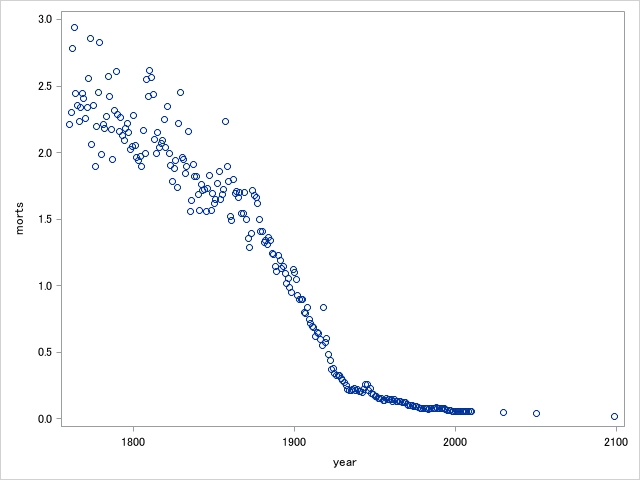

In [13]:
data sweden_long;
  set long;
  where country = "Sweden";
run;

proc sgplot data = sweden_long;
  scatter y = morts x = year;
run;

SCATTER を SERIES に変更するだけで、線グラフを作成することもできました。

<!-- 
I could have also made a line plot by simply changing SCATTER to SERIES.
-->


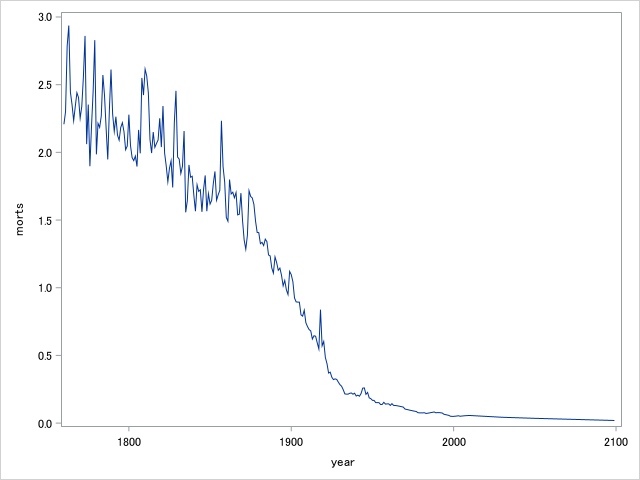

In [14]:
proc sgplot data = sweden_long;
  series y = morts x = year;
run;


LOESS ステートメントを使用すると、このデータにノンパラメトリックな平滑化した曲線を追加し、系列プロットの上にプロットすることもできます。

<!-- 
By using the LOESS statement, I can also add a nonparametric smoothing curve to this data and plot it ontop of the series plot.
-->


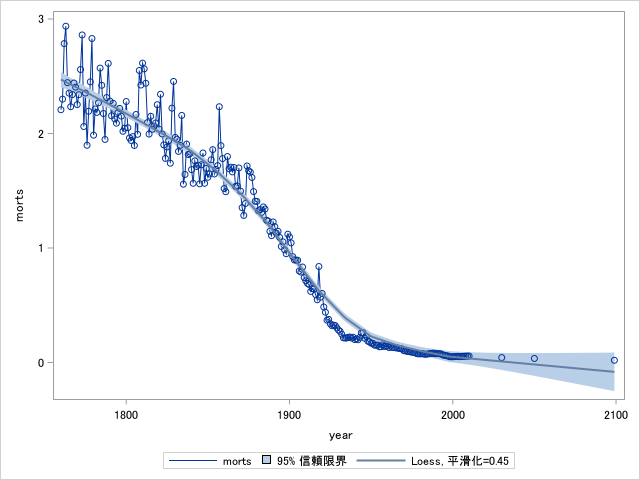

In [15]:
proc sgplot data = sweden_long;
  series y = morts x = year;
  loess  y = morts X = year / smooth = 0.45 CLM;
run;

次に、"United States"、"United Kingdom"、"Sweden"、"Afghanistan"、"Rwanda"の各国の線グラフを作成し、時間の経過に伴う死亡率を見てみましょう。各国の線グラフを個別に取得するには、GROUP= オプションを指定して、国の変数を割り当てる必要があります。


<!-- 
Now, let’s look at the mortality rates over time using line plots for each of the countries: United States, United Kingdom, Sweden, Afghanistan, Rwanda. To get a line for each country individually, we need to specify the GROUP= option and assign it to the country variable.
-->


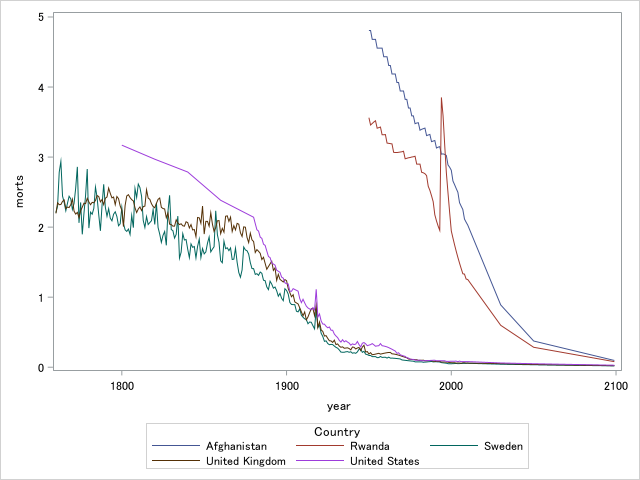

In [16]:
data sub;
  set long;
  where country in ("United States" "United Kingdom" 
                    "Sweden" "Afghanistan" "Rwanda");
run;

proc sgplot data = sub;
  series y = morts x = year / group = country;
run;

これらの 5 つの国のそれぞれについて、時間の経過に伴う死亡率の軌跡が 1 つのプロットに表示されることに注意してください。PROC SGPLOT は、各グループを区別し、凡例を提供するために、自動的にデフォルトの色を割り当てます。これらは後で変更する方法を学びます。

vbox/hbox の category= オプションを使用すると、国別に並べて箱ひげ図を作成することもできます。


<!-- 
Note that we get a single plot with trajectory over time of the mortality rates for each of these five countries. PROC SGPLOT will automatically assign default colors to differentiate each group and provide a legend. We will learn how to modify these later.

We could also make side by side boxplots of mortality rates by country by using the category= option in vbox/hbox.
-->


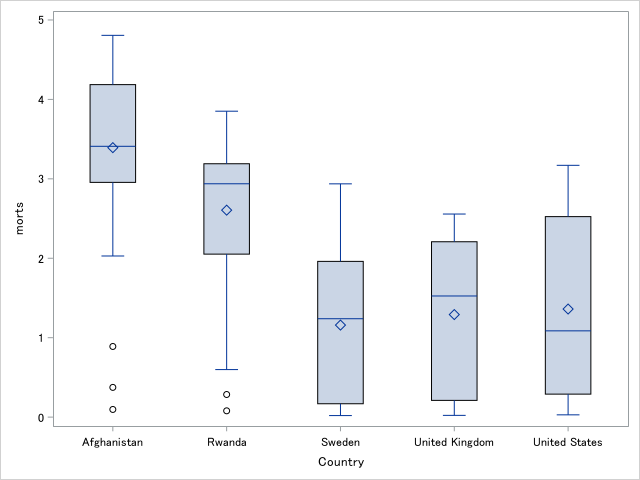

In [17]:
proc sgplot data = sub;
  vbox morts / category = country;
run;

### 軸とタイトル

グラフの調整として最初に扱うのは、説明的な軸ラベルとタイトルを追加する方法です。XAXIS および YAXIS LABEL= オプションを使用して軸ラベルを設定できます（または、データステップで変数にラベルを設定することもできます）。さまざまなレベルのタイトルを設定するには、TITLE ステートメントを使用します。TITLE ステートメントでは、TITLE1-TITLE10 を使用できます。TITLE の番号が大きくなるにつれて、タイトルのサイズは小さくなります。そのため、サブタイトルを作成できます。TITLE ステートメントはグローバルであり、SGPLOT の一部ではないため、別のプロットを作成する前に、これらのステートメントをリセットするか、変更する必要があります。そうしないと、同じタイトルが引き継がれてしまいます。

<!-- 
### Axes and Titles

The first adjustment we might want to make to a plot is adding descriptive axis labels and a title. We can set the axis labels using the XAXIS and YAXIS LABEL= option (or we can set a LABEL to the variable in a DATA step). To set different levels of titles, we use the TITLE statements. The TITLE statement allows TITLE1-TITLE10 where as the TITLE number increase the size of the title decrease, so we can make subtitles. Note that the TITLE statements are global and not part of SGPLOT, so we will need to reset these or change them before making another plot in order to prevent the same titles from carrying over.
-->


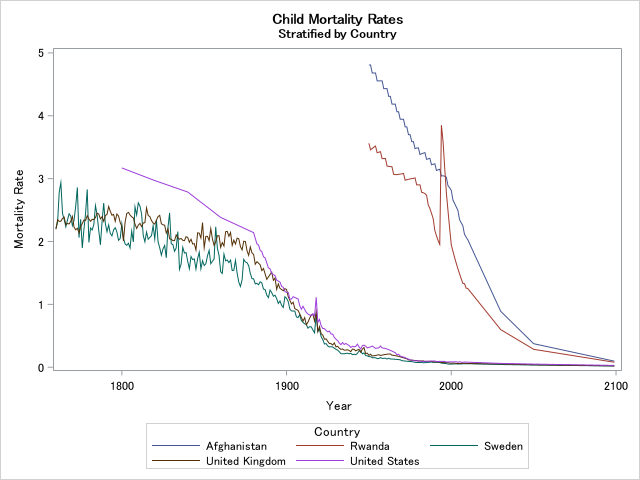

In [18]:
title "Child Mortality Rates";
title2 "Stratified by Country";
proc sgplot data = sub;
  series y = morts x = year / group = country;
  xaxis label = "Year";
  yaxis label = "Mortality Rate";
run;

XAXIS および YAXIS ステートメントの MIN= および MAX= オプションを使用して、x 軸と y 軸の制限を調整できます。たとえば、1900 年から 2000 年で、死亡率が 下から3つの目盛までの0 から 1.5 の範囲に拡大できます。


<!-- 
The x and y axis limits can be adjusted by using the MIN= and MAX= options in the XAXIS and YAXIS statments. For example, we can zoom in on the years 1900-2000 for the bottom three lines where the mortality rates range from 0 to 1.5.
-->


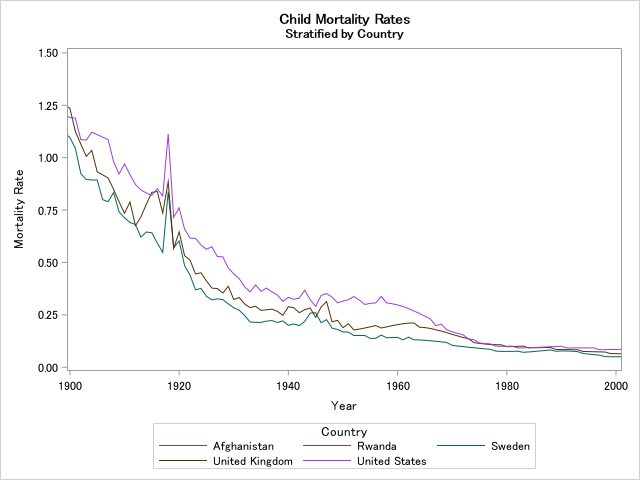

In [19]:
title "Child Mortality Rates";
title2 "Stratified by Country";  
proc sgplot data = sub;
  series y = morts x = year / group = country;
  xaxis label = "Year" min = 1900 max = 2000;
  yaxis label = "Mortality Rate" min = 0 max = 1.5;
run;

x 軸または y 軸のデフォルトの目盛りを変更することもできます。これは、XAXIS および YAXIS ステートメントの VALUES= オプションを使用して行うことができます。

<!-- 
We may also want to change the default tic marks on the x and or y axes. This can be done using the VALUES= option in the XAXIS and YAXIS statements.
-->


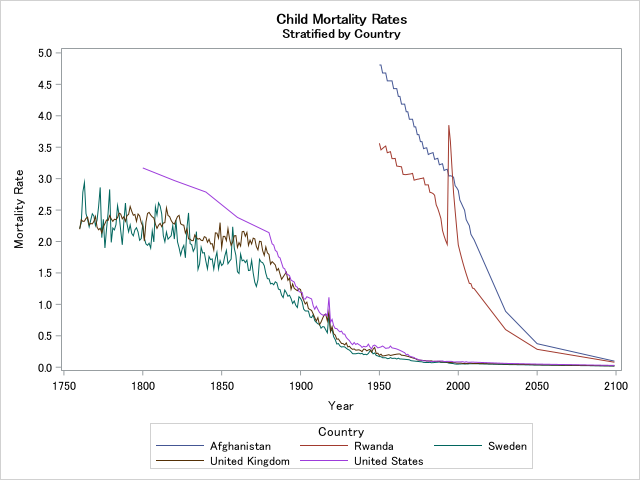

In [20]:
title "Child Mortality Rates";
title2 "Stratified by Country";
proc sgplot data = sub;
  series y = morts x = year / group = country;
  xaxis label = "Year" values = (1750 to 2100 by 50);
  yaxis label = "Mortality Rate" values = (0 to 5 by 0.5);
run;


これらの目盛りに表示されるテキストを実際の数字とは異なるものに変更したい場合、VALUESDISPLAY=オプションを使用します。
<!-- 
If you want to change the text displayed at each of these tic marks to be different from the actual numbers, use the VALUESDISPLAY= option.
-->


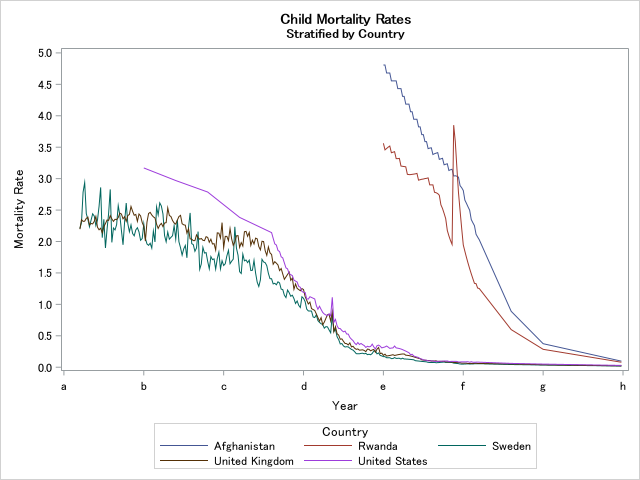

In [21]:
title "Child Mortality Rates";
title2 "Stratified by Country";
proc sgplot data = sub;
  series y = morts x = year / group = country;
  xaxis label = "Year" values = (1750 to 2100 by 50)
        valuesdisplay = ('a' 'b' 'c' 'd' 'e' 'f' 'g' 'h');
  yaxis label = "Mortality Rate" values = (0 to 5 by 0.5);
run;

XAXISとYAXISのステートメントでは、色、フォント、位置、回転など、軸とラベルテキストを変更するための他のオプションも提供されています：

* FITPOLICY= - 通常描画するのに十分なスペースがない場合に、水平軸上の目盛りの値をどのようにフィットさせるかを指定します。
* LABELATTRS= - 軸ラベルの見た目を指定します。
* LABELPOS= - 軸ラベルの位置を指定します。
* VALUEATTRS= - 軸の目盛りの値のラベルの見た目を指定します。
* VALUESROTATE= 軸上の目盛りの値がどのように回転するかを指定します。可能なオプションはDIAGONAL | DIAGONAL2 | VERTICALです（これは軸テキストが重なっている場合にのみ適用されます。強制的に回転させるには、FITPOLICYをROTATEALWAYSに設定する必要がありますが、これはSAS 9.4M7以降でのみ動作します。それ以外の場合は、ANNOTATIONデータセットを使用する必要があります）。

タイトルのテキストの見た目を調整するために、TITLEステートメントで同様のテキストオプションを指定することができます。

<!-- 
The XAXIS and YAXIS statements also provide other options to modify the axis and label text such as color, font, position, and rotation:

* FITPOLICY= - specifies the method that is used to fit tick mark values on a horizontal axis when there is not enough room to draw them normally.
* LABELATTRS= - specifies the appearance of the axis labels.
* LABELPOS= - specifies the position of the axis label.
* VALUEATTRS= - specifies the appearance of the axis tick value labels.
* VALUESROTATE= specifies how the tick values are rotated on the axis with the possible options of DIAGONAL | DIAGONAL2 | VERTICAL (This only applies when axis text is overlapping. To force rotation, you must set FITPOLICY to ROTATEALWAYS but this only works in SAS 9.4M7 and on. Otherwise you must use an ANNOTATION data set.)

We can specify similar text options in a TITLE statement to adjust the text appearance in a title.
-->


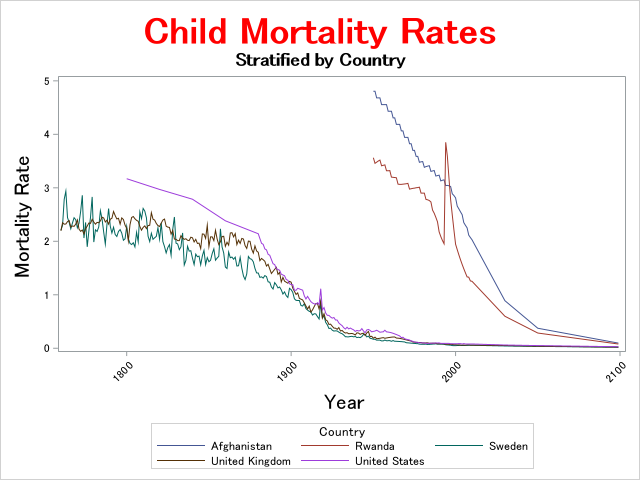

In [22]:
title height = 1cm justify = C bold color = 'red' "Child Mortality Rates";
title2 height = 0.5cm bold justify = C "Stratified by Country";
proc sgplot data = sub;
  series y = morts x = year / group = country;
  * Note: The VALUESROTATE option only works here on SAS version 9.4M7 and later;
  xaxis label = "Year" fitpolicy=rotatealways valuesrotate = diagonal2
        valueattrs = (size = 8) labelattrs = (size = 15);
  yaxis label = "Mortality Rate " valueattrs = (size = 8)
        labelattrs = (size = 15);
run;

### グラフの文字、線種、色

グループ化変数を使用しない基本的なプロットの場合、対応するATTRSオプションを使用してこれらの視覚的特性を変更できます。

* MARKERATTRS= - 色、サイズ、プロット文字などのプロット文字の視覚的外観を変更します（詳細については、マーカー属性とシンボルを参照してください）。
* LINEATTRS - 色、線種、太さなどの線の視覚的外観を変更します（詳細については、線属性とパターンを参照してください）。

例として、Swedenの死亡率対年の散布図にプロットされるマーカーを赤い三角形に変更してみましょう。


<!-- 
### Plotting Characters, Line Types and Their Colors

For basic plots without a grouping variable, we can use the corresponding ATTRS option to modify these visual characteristics:

* MARKERATTRS= - alter the visual appearance of plotting characters such as color, size, and plotting character (see [Marker Attributes and Symbols](https://documentation.sas.com/?docsetId=grstatproc&docsetTarget=p0i3rles1y5mvsn1hrq3i2271rmi.htm&docsetVersion=9.4&locale=en) for more details)
* LINEATTRS - alter the visual appearance of a line such as color, line type and thickness (see [Line Attributes and Patterns](https://documentation.sas.com/?docsetId=grstatproc&docsetTarget=p0er4dg9tojp05n1sf7maeqdz1d8.htm&docsetVersion=9.4&locale=en) for more details)

For example, let's adjust the plotting character in a scatterplot of mortality rate vs year for Sweden to be a red triangle.
-->


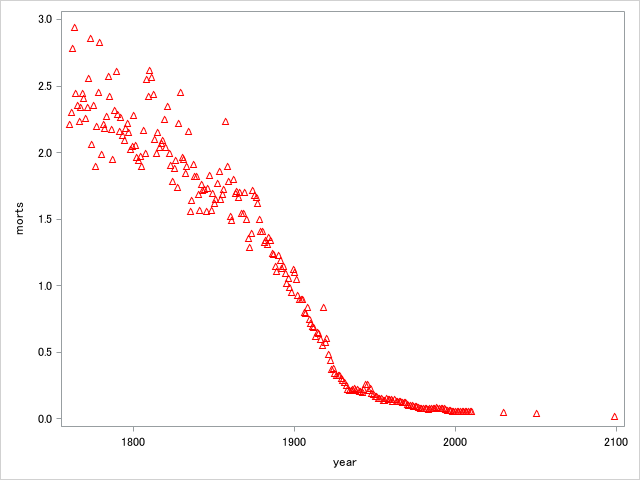

In [23]:
title ; *Reset the titles;
title2 ;
proc sgplot data = sweden_long;
  scatter y = morts x = year 
      / markerattrs=(color = 'red' symbol = triangle);
run;

またSERIESプロットで直線の青い線を点線のオレンジ色の線に変更することもできます。


<!-- 
Or we can change the straight blue line to a dashed orange line in a SERIES plot.
-->


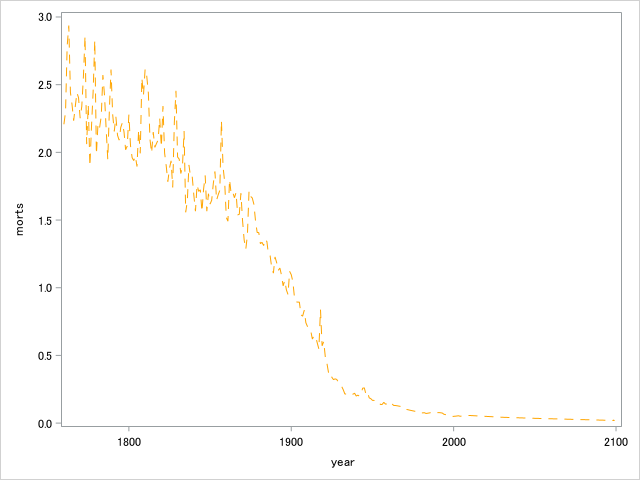

In [24]:
proc sgplot data = sweden_long;
  series y = morts x = year 
      / linerattrs=(color = 'orange' pattern = dash);
run;

これらの属性を手動で設定するには、dattrmap=オプションとattrid=オプションに渡すattribute map(属性マッピングデータセット)を使用する必要があります。この属性マッピングデータセットは、グループ化変数の値と色、線種、プロット文字などのさまざまな属性へのマッピングを定義します。

属性マッピングデータセットを作成するには、次の文字変数を使用してデータステップでデータセットを作成する必要があります。

* ID - 必須の文字変数で、単一の属性マップに対応するすべての行を識別します。
* VALUE - 必須の文字変数で、現在の行でマッピングされているグループ化変数の値を識別します。
* 他の属性変数 - これらは、linecolorやmarkercolorなどの予約キーワードになります（属性マップデータセットを参照して、データマップで使用できる予約属性キーワードの完全なリストを確認してください）。

データセットには、IDとVALUEの2つの変数が必要です。属性マッピングがPROC SGPLOTで機能するには、属性マッピングデータセットでこれらの変数を使用する必要があります。

例として、次のデータ属性マッピングは、死亡率対年の散布図で各国に割り当てられているマーカーと色を変更します。

<!-- 
To set any of these attributes manually, we will need to use discrete attribute map dataset to pass in to the dattrmap= option and the attrid= option. This discrete attribute map dataset will define the mapping of our grouping variable to the different attributes such as color, line type or plotting character.

To create a discrete attribute map dataset, we must build a dataset using a DATA step with the following (character) variables:

* ID - this required string variable identifies all the rows that correspond to a single attribute map.
* VALUE - this required string variable identifies the grouping variables value that is being mapped in the current row.
* Other attribute variables - These will be reserved keywords such as linecolor and markercolor (see <a href="https://documentation.sas.com/?docsetId=grstatproc&docsetTarget=n18szqcwir8q2nn10od9hhdh2ksj.htm&docsetVersion=9.4&locale=en">Data Attribute Map Datasets</a> for a full list of reserved attribute keyword that can be used in a data map.)

Note that the dataset requires the two variables ID and VALUE. You must include and use these names in your attribute map for the mapping dataset to work with PROC SGPLOT.

For example, the following data attribute map will change the plotting characters and colors assigned to each country in the scatterplot of mortality rate versus year.
-->


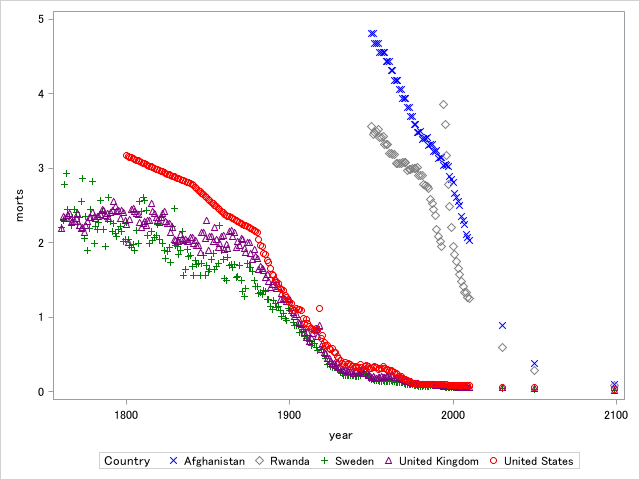

In [25]:
data marker_map;
  input id $2. +1 VALUE $15. MARKERSYMBOL $8. MARKERCOLOR $10.;
  VALUE = strip(value);
  datalines;
ms Afghanistan    X        blue
ms Rwanda         Diamond  light blue
ms Sweden         plus     green
ms United Kingdom triangle purple
ms United States  circle   red
;
run;

proc sgplot data = sub dattrmap = marker_map;
  scatter y = morts x = year / group = country attrid = ms;
run;

SASの色に関する詳細については、[Color-Naming Schemes](shttps://documentation.sas.com/?docsetId=grstatproc&docsetTarget=n18szqcwir8q2nn10od9hhdh2ksj.htm&docsetVersion=9.4&locale=en)を参照してください。

同様に、線の属性を変更する属性マッピングデータを作成します。

<!-- 
For more information on SAS colors, see [Color-Naming Schemes](shttps://documentation.sas.com/?docsetId=grstatproc&docsetTarget=n18szqcwir8q2nn10od9hhdh2ksj.htm&docsetVersion=9.4&locale=en).

Similarly, we can create an attribute map to alter line attributes.
-->


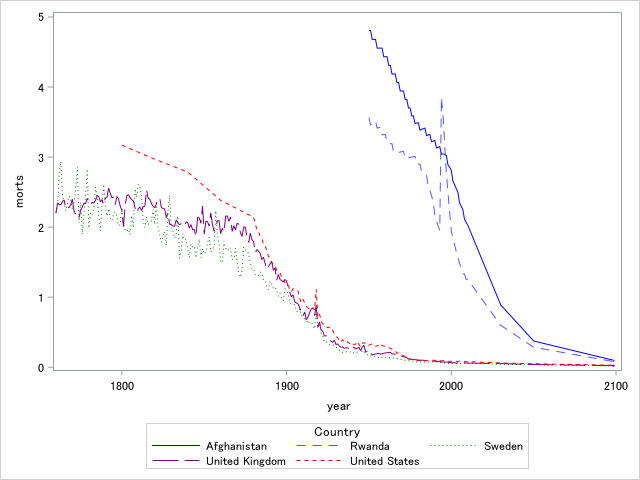

In [26]:
data line_map;
  input id $2. +1 VALUE $15. LINEPATTERN $9. +1 LINECOLOR $10.;
  VALUE = strip(value);
  datalines;
lp Afghanistan    Solid     blue
lp Rwanda         Dash      light blue
lp Sweden         Dot       green
lp United Kingdom LongDash  purple
lp United States  ShortDash red
;
run;

proc sgplot data = sub dattrmap = line_map;
  series y = morts x = year / group = country attrid = lp;
run;

複数の属性マップを単一のデータセットに結合して、マーカーと線種の両方など、さまざまに見た目を調整することもできます。


<!-- 
We can also combine multiple attribute maps into a single dataset to adjust different visual attributes such as both plotting characters and line types.
-->


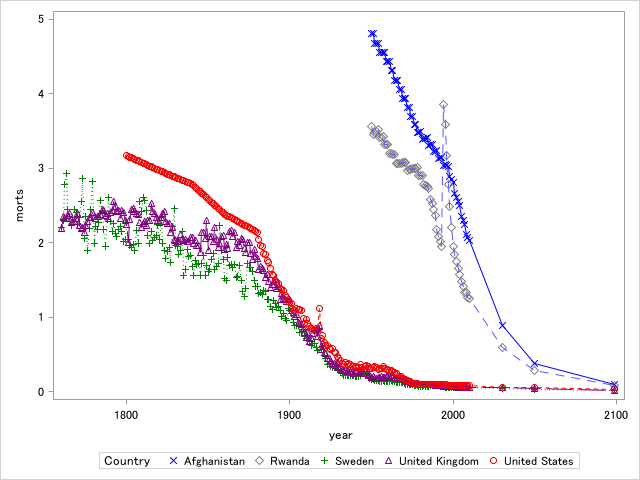

In [27]:
data my_map;
  input id $2. +1 VALUE $15. LINEPATTERN $9. +1 LINECOLOR $10. +1 
        MARKERSYMBOL $8. MARKERCOLOR $10.;
  VALUE = strip(value);
  datalines;
am Afghanistan    Solid     blue       X         blue
am Rwanda         Dash      light blue Diamond   light blue 
am Sweden         Dot       green      plus      green
am United Kingdom LongDash  purple     triangle  purple
am United States  ShortDash red        circle    red
;
run;

proc sgplot data = sub dattrmap = my_map;
  scatter y = morts x = year / group = country attrid = am;
  series y = morts x = year / group = country attrid = am;
run;

### 凡例の変更

PROC SGPLOTの凡例を変更するには、KEYLEGENDステートメントを使用できます。たとえば、凡例のタイトルを変更するには、KEYLENGNDでTITLE=オプションを使用します。グループ化変数によって作成されたラベルを変更するには、フォーマットを適用する必要があります。

<!-- 
### Modifying a Legend

To modify the legend in PROC SGPLOT, we can use the KEYLEGEND statement. For example, to change the title of a legend, we use the TITLE= option in KEYLENGND. To modify the labels made by a grouping variable, we need to apply a FORMAT.
-->


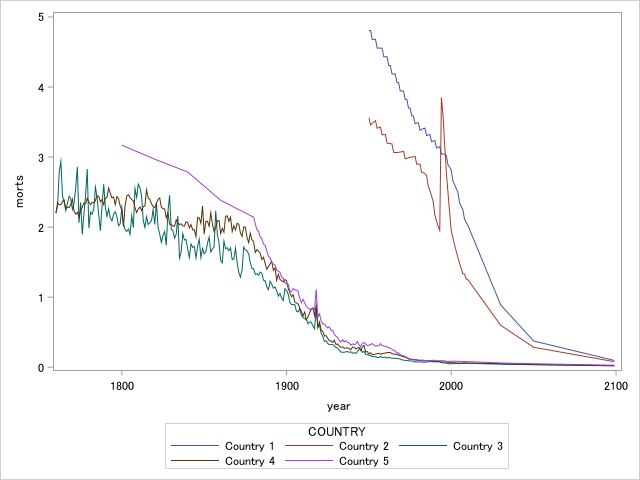

In [28]:
proc format;
  value $countryfmt
    "Afghanistan" = "Country 1"
    "Rwanda" = "Country 2"
    "Sweden" = "Country 3"
    "United Kingdom" = "Country 4"
    "United States" = "Country 5";
run;

proc sgplot data = sub;
  series y = morts x = year / group = country;
  keylegend / title = "COUNTRY";
  format country $countryfmt.;
run;

凡例を非表示にするには、PROC SGPLOTでNOAUTOLEGENDオプションを使用します。KEYLEGENDステートメントで凡例オプションを手動で設定した場合、NOAUTOLEGENDオプションは無視されるため、凡例を抑制するにはKEYLEGENDステートメントを削除する必要があります。


<!-- 
To hide the legend use the NOAUTOLEGEND option in PROC SGPLOT. Note if you manually set any legend options in the KEYLEGEND statement, then it will ignore the NOAUTOLEGEND option, so we need to remove the KEYLEGEND statement to suppress the legend.
-->


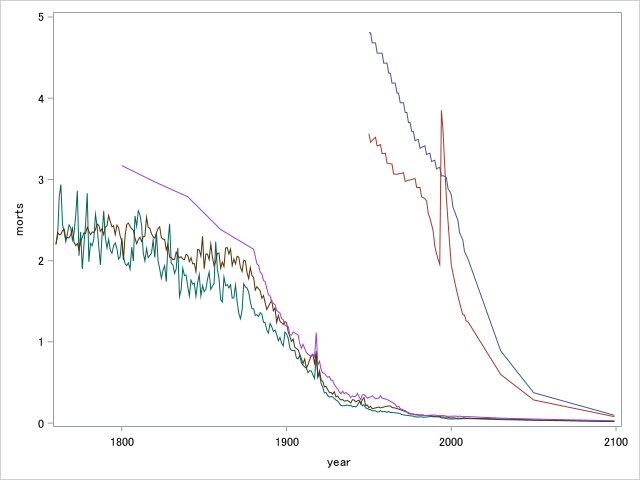

In [29]:
proc sgplot data = sub noautolegend;
  series y = morts x = year / group = country;
run;

KEYLEGENDのPOSITIONオプションを使用して、凡例の位置を変更できます。POSITIONは、bottom、bottomleft、bottomright、left、right、top、topleft、toprightの値を取ることができます。LOCATION=INSIDEを指定することで、凡例をプロット領域内に移動することもできます。凡例の行と列の数を設定するには、ACROSS=および/またはDOWN=オプションを使用します。


<!-- 
We can alter the position of the legend by using the POSITION option in KEYLEGEND. POSITION can take the values bottom, bottomleft, bottomright, left, right, top, topleft, and topright. We can also move the legend inside the plotting region by specifying LOCATION=INSIDE. To set the number of rows and columns formed in the legend use the ACROSS= and/or DOWN= options.
-->


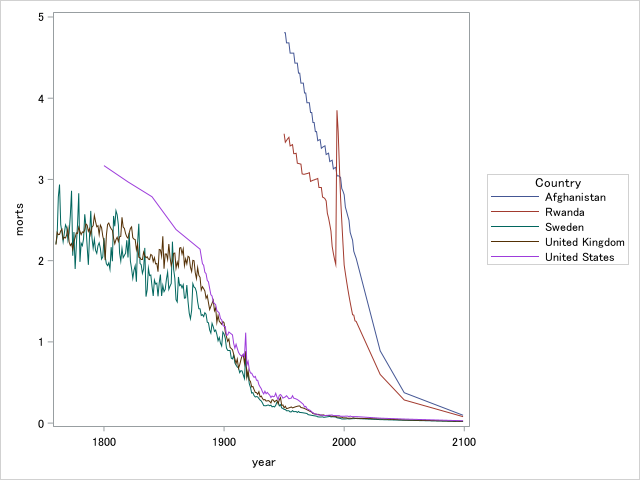

In [30]:
proc sgplot data = sub noautolegend;
  series y = morts x = year / group = country;
  keylegend / position = right;
run;


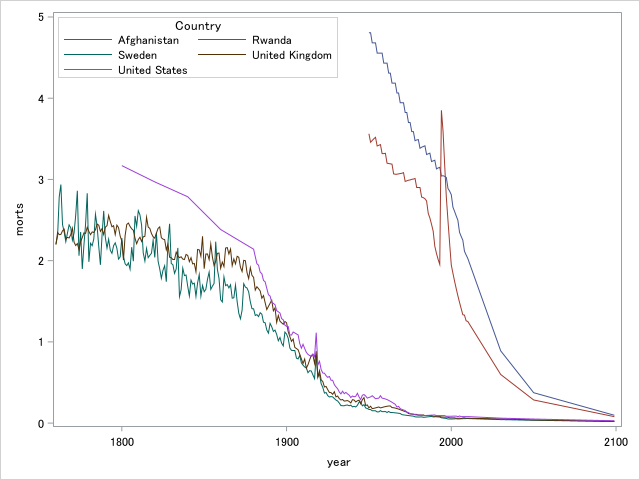

In [31]:
proc sgplot data = sub noautolegend;
  series y = morts x = year / group = country;
  keylegend / position = topleft location=inside across=2;
run;


TITLEATTRS=とVALUEATTRS=オプションを使用して、凡例内のテキストの外観を変更できます。これらのオプションは、前に見た色、サイズ、フォントなどのさまざまなテキストのスタイルを受け取ります。


<!-- 
We can modify the appearance of the text in the legend by using the TITLEATTRS= and VALUEATTRS= options. These option take the different text properties such as color, size and font that we saw earlier.
-->


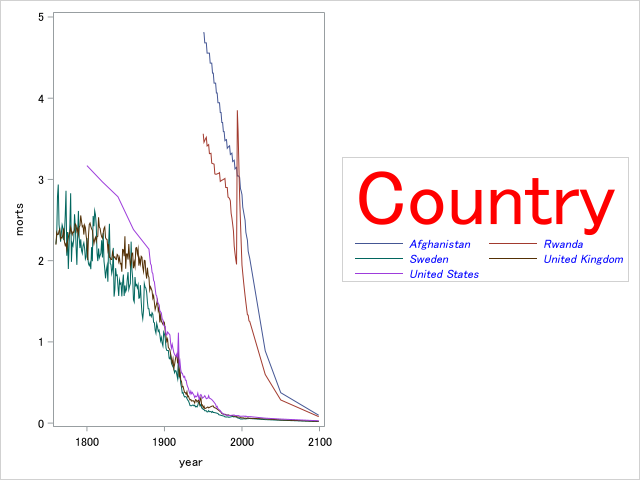

In [32]:
proc sgplot data = sub noautolegend;
  series y = morts x = year / group = country;
  keylegend / position = right across=2
              titleattrs=(color='red' size=2cm)
              valueattrs=(color='blue' style=italic);
run;

### テキスト注釈の追加

PROC SGPLOTからプロットにテキストを追加するには、3つの方法があります。

* INSET
* TEXT
* SGANNO

最初の例では、INSETステートメントを使用して、相関係数値を散布図に追加します。


<!-- 
### Adding Text Annotations

There are three ways to add text to a plot form PROC SGPLOT

* INSET
* TEXT
* SGANNO

The first example uses the INSET statement to add the correlation coefficient value to the a scatterplot.
-->


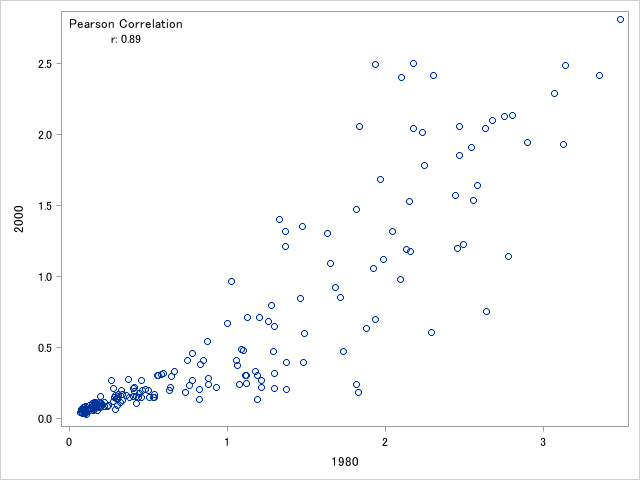

In [33]:
proc sgplot data=mort;
  scatter y = '2000'n x = '1980'n;
  inset ("r: 0.89" = "") / position = topleft title = "Pearson Correlation" 
                           labelalign = center;
run;


テキストを追加する2番目の方法は、TEXTステートメントによる表示を使用することです。これは、グラフ内の関連付けられた（X、Y）位置にテキストを表示します。

<!-- 
The second way to add text is with the TEXT display. This displays text at an associatied (X,Y) location in the graph. 
-->


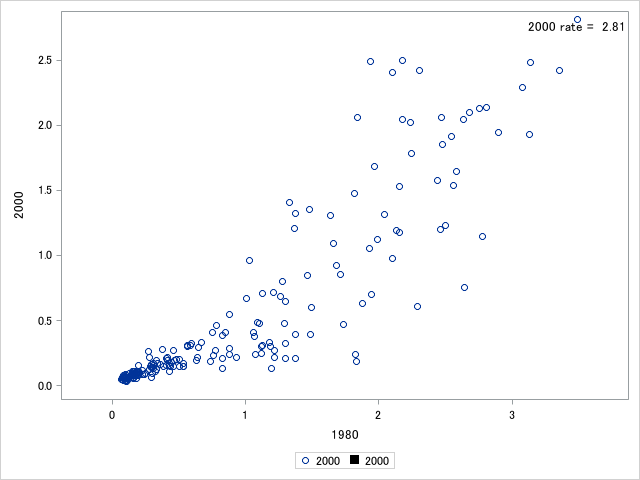

In [35]:
data mort;
  set mort ;
  length text $17;
  if '2000'n > 2.5 then text = ("2000 rate = " || '2000'n);
run;

proc sgplot data=mort;
  scatter y = '2000'n x = '1980'n;
  text y = '2000'n x = '1980'n text=text / position = bottom textattrs=(size=10);
run;

テキストを追加する3番目の方法は、SGANNOを使用することです。この方法を使用するには、プロットに追加するテキストラベルを含む別のアノテーションデータセットを作成します。

<!-- 
The third way to add text is by using SGANNO. To use this method, we create a separate ANNOTATION dataset with out text label(s) in it to be added to the plot.
-->


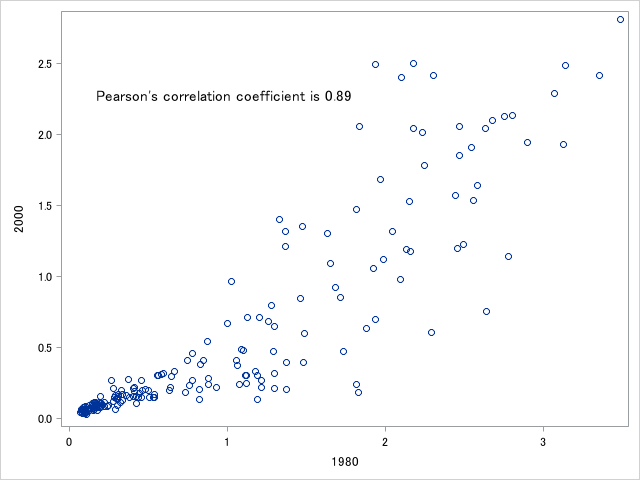

In [36]:
data mort_anno;
  length label $50 x1space $20 y1space $20;
  input function $ label $ x1 y1 width x1space $ y1space $
        textsize;
  infile datalines dsd;
  datalines;
text,Pearson's correlation coefficient is 0.89,35,80,500,graphpercent,graphpercent,11
;
run;

proc sgplot data=mort sganno=mort_anno;
  scatter y = '2000'n x = '1980'n;
run;

詳細については、Yaqi Jiaの[Three Ways to Add Text to Graphics in PROC SGPLOT](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3644-2019.pdf)を参照してください。

<!-- 
See Yaqi Jia's paper [Three Ways to Add Text to Graphics in PROC SGPLOT](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3644-2019.pdf) for more details.
-->

### 単一の図に複数のグラフを描画する

密集したグラフを、いくつかのグループ化によってより小さな別々のプロットに分割したい場合は、PROC SGPANELを使用できます。例として、死亡率データサブセットのloess曲線を含む5つの別々の散布図を作成したい場合、PROC SGPLANELを使用して、これらの散布図を1つのパネルにプロットするのではなく、5つの別々のプロットに分割できます。


<!-- 
### Drawing Multiple Plots in a Single Figure

If we want to break down a dense plot into smaller separate plots by some grouping, we can use PROC SGPANEL. For example, if I want 5 separate scatterplots with loess lines for the mortality data subset sub, we could use PROC SGPLANEL to break these into 5 separate plots instead of one that are plotted in a single panel.
-->


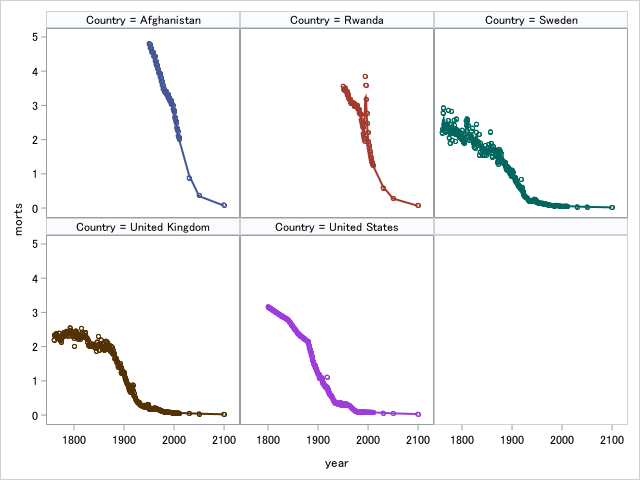

In [37]:
proc sgpanel data = sub noautolegend;
  panelby country; 
  scatter y = morts x = year / group = country;
  loess y = morts x = year / group = country;
  format country $20.;
run;

PANELBYのROWS=とCOLUMNS=オプションを使用して、レイアウトと行と列の数を調整できます。


<!-- 
We can adjust the layout and number of rows and columns by using the ROWS= and COLUMNS= options in PANELBY;
-->


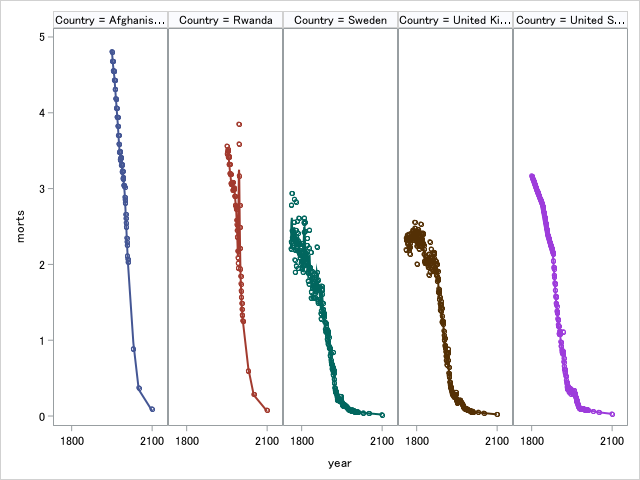

In [38]:
proc sgpanel data = sub noautolegend;
  panelby country / rows=1 columns=5; 
  scatter y = morts x = year / group = country;
  loess y = morts x = year / group = country;
  format country $20.;
run;

複数の異なるプロットを単一の図に含めるには、ODS GRAPHICSのGRIDDED LAYOUT機能を使用できます。レイアウトを作成するには、最初にグリッドレイアウトを有効にして、行と列の数を指定して形式を定義する必要があります。次に、ODS REGIONステートメントを使用して、グリッドの各部分に何が含まれるかを分割します。

<!-- 
To include several differnt plots into a single figure, we can use the GRIDDED LAYOUT  feature of ODS GRAPHICS. To create the layout, we must first enable the grid layout and define the format by specifying the number of rows and columns. Then use the ODS REGION statement to break up what goes into each part of the grid.
-->

In [39]:
proc glm data = mort(keep='2000'n '1980'n) noprint;
  model '2000'n = '1980'n;
  output out=fitstat residuals = resid predicted = fitted;
run;

proc print data = fitstat(obs=5);
run;

OBS,1980,2000,resid,fitted
1,3.490352139,2.811858292,0.50536,2.30650
2,0.334426215,0.126746215,0.00002,0.12673
3,1.216621171,0.216880367,-0.51917,0.73605
4,3.139291928,2.484475049,0.42045,2.06403
5,0.301924994,0.140326167,0.03605,0.10428


,
,

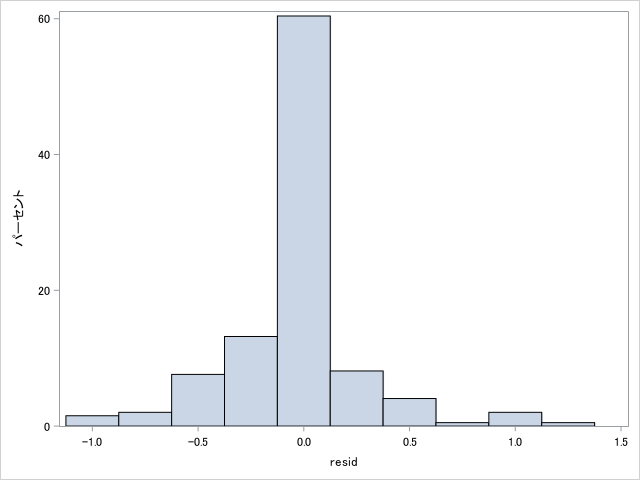
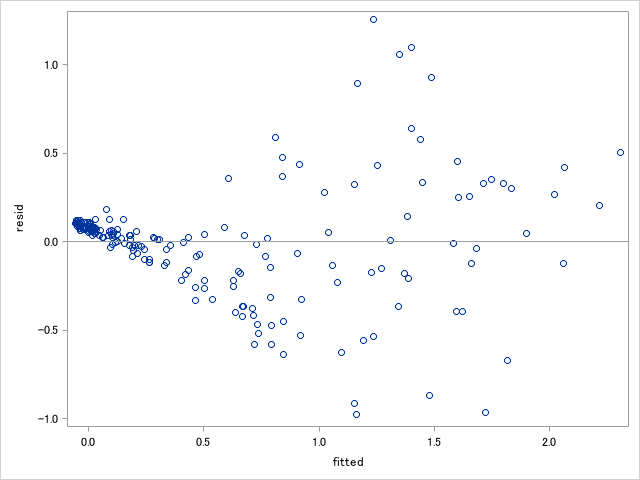
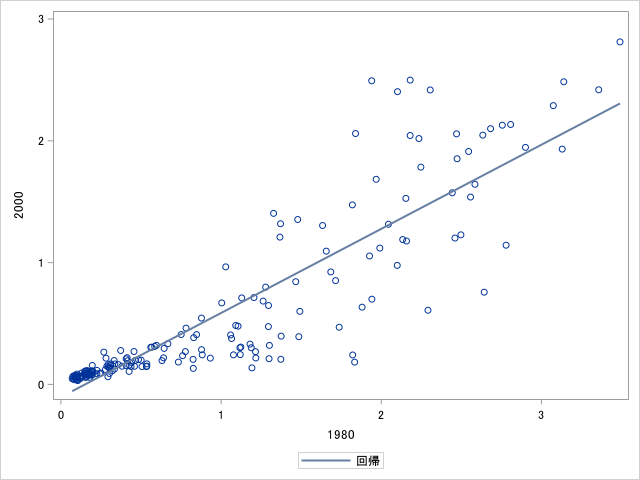
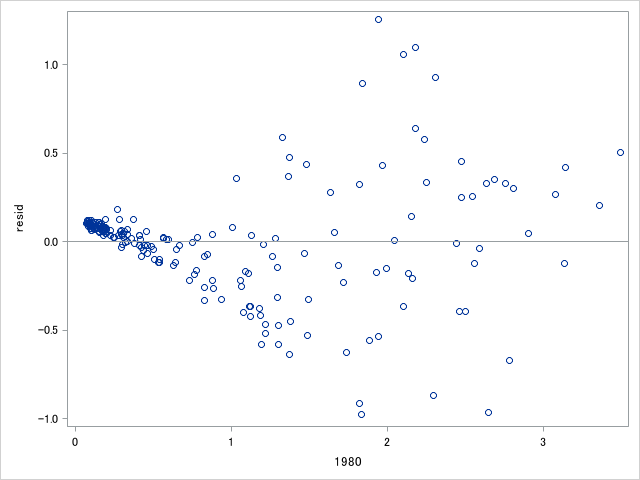

In [40]:
ods layout gridded columns = 2 rows = 2;
ods region;
proc sgplot data = fitstat;
  histogram resid;
run;

ods region;
proc sgplot data = fitstat;
  scatter y = resid x = fitted;
  refline 0 / axis = y;
run;

ods region;
proc sgplot data = fitstat;
  reg y = '2000'n x = '1980'n;
run;

ods region;
proc sgplot data = fitstat;
  scatter y = resid x = '1980'n;
  refline 0 / axis = y;
run;

ods layout end;

これらのプロットを保存するには、前に触れたODSの出力先でPDFやRTFなどを指定すれば、外部のファイルに保存することができます。

<!-- 
To save these plots, we will use the ODS destinations we learned earlier such as PDF or RTF to save these plots to an external file.
-->

## 演習

これらの演習問題では、charm city循環バスの乗客数データCharm_City_Circulator_Ridership.csvを使用します。PC上のデータセットへのパスを変更した後、以下のコードを使用してデータセットを読み込み、グラフに使用できるように加工します。

<!--
## Exercises

For these exercises, we will use the charm city circulator bus ridership dataset, Charm_City_Circulator_Ridership.csv. After modifying the path to the dataset on your computer, use the following code to read in and transform the dataset to be ready for use in plotting.
-->

In [3]:
proc import datafile = "/folders/myfolders/SAS_Notes/data/Charm_City_Circulator_Ridership.csv"
            out = circ dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

data long;
  set circ;
  array larray[*] orangeBoardings -- bannerAverage;
  do i = 1 to dim(larray);
    var = vname(larray[i]);
    number = larray[i];
    var = tranwrd(var, 'Board', ' Board');
    var = tranwrd(var, 'Alight', ' Alight');
    var = tranwrd(var, 'Average', ' Average');
    route = scan(var, 1);
    type = scan(var, 2);
    output;
  end;
   
  drop i var orangeBoardings -- bannerAverage;
run;

data avg;
  set long;
  where type = 'Average' and number ^= .;
run;

proc print data = long(obs = 10);
run;

proc print data = avg(obs=10);
run;

Obs,day,date,daily,number,route,type
1,Monday,01/11/2010,952,877,orange,Boardings
2,Monday,01/11/2010,952,1027,orange,Alightings
3,Monday,01/11/2010,952,952,orange,Average
4,Monday,01/11/2010,952,.,purple,Boardings
5,Monday,01/11/2010,952,.,purple,Alightings
6,Monday,01/11/2010,952,.,purple,Average
7,Monday,01/11/2010,952,.,green,Boardings
8,Monday,01/11/2010,952,.,green,Alightings
9,Monday,01/11/2010,952,.,green,Average
10,Monday,01/11/2010,952,.,banner,Boardings


1. データセットavgから日付ごとの平均乗客数の散布図を作成してください。
    a. ポイントの色をルート（オレンジ、パープル、グリーン、バナー）で色分けしてください。ここではデフォルトの色で構いません。
    b. 各ルートに対して黒い滑らかな曲線（LOESS）を追加してください。
    c. ポイントの色を曜日ごとにしてください。
2. ポイントの色がルートの名前（バナー→青）である1aを再プロットしてください。注：属性マッピングデータを作成する必要があります。
3. ルートごとにパネルを1つずつ持つ、日付ごとの平均乗客数の散布図を作成してください。
4. 曜日ごとに別々のパネルを持ち、ルートで色分けされた、日付ごとの平均乗客数の散布図を作成してください。
5. ルートで色分けされた（1aと同じ）、日付ごとの平均乗客数（avg）の散布図を作成してください。（平均を算出はせず、各ルートの平均の列を使用します）。x軸のラベルを"Year"、y軸のラベルを"Number of People"にします。
6. オレンジルートの日付に対する平均乗客数の線グラフを作成し、乗車数(boardings)と降車数(alightings)も誤差線として破線にして追加してください。線の色はオレンジにします。


<!-- 
1. Plot average ridership (avg data set) by date using a scatterplot.
    a. Color the points by route (orange, purple, green, banner). Default colors are fine here.
    b. Add black smoothed curves (LOESS) for each route
    c. Color the points by day of the week
2. Replot 1a where the colors of the points are the name of the route (with banner –> blue). Note: you will need to make a data attribute map.
3. Plot a scatterplot of average ridership by date with one panel per route.
4. Plot a scatterplpot of average ridership by date with separate panels by day of the week, colored by route.
5. Plot a scatterplot of average ridership (avg) by date, colored by route (same as 1a). (do not take an average, use the average column for each route). Make the x-label "Year". Make the y-label "Number of People".
6. Plot average ridership on the orange route versus date as a solid line, and add dashed “error” lines based on the boardings and alightings. The line colors should be orange. 
-->